<h2><center><h1><center><font color='Red'> RL   <font color='Green'> Cab <font color='Blue'> Driver  <font color='Orange'> Assignement :

<h5><center> By <br><br>
Farooq Ahmed  <br>
email <font color='Blue'> farooqams@hotmail.com<font color='Blue'> <br>
<h4><center> June 2022<br><br>

#### Objective of the Assignement 

###### The assignement required to build an RL agent that optimize taxi driving strategies for profit maximization. This optimisation problem is formulated as a Markov Decision Process.


###### We will approach the problem by  assessing the significant drivers /layers and identifying the problem by Pythonic way, reducing duplcating task where possible / applicable. In addtion, using in Google Colab Pro (if Required using GPU). 


# Reset Colab Drive - Optional 

In [1]:
from google.colab import drive
drive.flush_and_unmount()
print("Data Deleted")


Data Deleted


In [2]:
!rm -rf /content/RL_CAB




# Version Control

In [3]:
%tensorflow_version 2 #1.5.0
## we use version 2 since it compitable with TDQM 

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2 #1.5.0`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [4]:
import tensorflow
print(tensorflow.__version__)

2.8.2


# BenchMarking System Resources

In [5]:
import psutil
cpu = psutil.cpu_count(logical=True)
print('Your runtime has {:.0f} available CPUs\n'.format(cpu))
psutil.disk_usage('/content')

Your runtime has 4 available CPUs



sdiskusage(total=179134558208, used=41632133120, free=137485647872, percent=23.2)

In [6]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)


Tue Jun 21 18:13:07 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    25W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [8]:
%%time
import warnings
warnings.filterwarnings('ignore')

CPU times: user 16 µs, sys: 3 µs, total: 19 µs
Wall time: 23.6 µs


# Install Library [Not Available in Colab]

# Import Regular Library

In [9]:
import datetime 
import time
import numpy as np 
import pandas as pd
import json 

In [10]:
import seaborn as sns ## download for using rich sea-born theme 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

#from PIL import Image

In [11]:
from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

In [12]:
import tqdm
from tqdm import tqdm
from tqdm.notebook import tqdm
tqdm.pandas()

In [13]:
import os
import sys
import datetime
from scipy.stats import norm

In [14]:
# Assignement Related Library 
import random
import math
from collections import deque
import collections
import pickle


  

In [15]:
# Tensorflow 

from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras.optimizers import Adam

In [16]:
%%time
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

CPU times: user 7.29 ms, sys: 1.05 ms, total: 8.34 ms
Wall time: 7.88 ms


*Authenticate* and create the PyDrive client.

In [17]:
%%time
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

CPU times: user 20 ms, sys: 2 ms, total: 22 ms
Wall time: 640 ms


# Download  and Cleaning Data


In [18]:
%%time
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive
CPU times: user 171 ms, sys: 35.3 ms, total: 206 ms
Wall time: 4.96 s


In [19]:
!ls #'/content/gdrive'

 gdrive   rewards_final.pkl   sample_data  'States Tracked.pkl'


In [20]:
if os.path.isdir('/content/RL_CAB')==True:
  print('Path Exist')
if os.path.isdir('/content/RL_CAB')==False:
  os.mkdir('/content/RL_CAB')

In [21]:
# set default path for import local library 
sys.path.insert(0,'/content/RL_CAB')

 We copy data in Colab for faster execution

In [22]:
!cp -av '/content/gdrive/MyDrive/RL_CAB' '/content'

'/content/gdrive/MyDrive/RL_CAB/Env.py' -> '/content/RL_CAB/Env.py'
'/content/gdrive/MyDrive/RL_CAB/TM.npy' -> '/content/RL_CAB/TM.npy'


In [23]:
root_path = '/content/RL_CAB' # use CoLab Drive for faster processing 

In [24]:
!ls 

 gdrive   rewards_final.pkl   RL_CAB   sample_data  'States Tracked.pkl'


In [25]:
root_path

'/content/RL_CAB'

In [26]:
from Env import CabDriver

In [27]:
env = CabDriver()

# Load the Time Matrix




In [28]:
#Loading the time matrix provided as provided
Time_matrix = np.load("/content/RL_CAB/TM.npy")

In [29]:
Time_matrix

array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

        [[ 2.,  3.,  3., ...,  7.,  0.,  6.],
         [ 2.,  3.,  3., ...,  7.,  0.,  6.],
         [ 2.,  3.,  3., ...,  7.,  0.,  6.],
         ...,
         [ 2.,  3.,  6., ...,  7.,  4.,  2.],
         [ 2.,  3.,  6., ...,  7.,  4.,  2.],
         [ 2.,  3.,  6., ...,  7.,  4.,  2.]],

        [[ 2.,  6.,  5., ...,  3.,  7.,  7.],
         [ 2.,  6.,  5., ...,  3.,  7.,  7.],
         [ 2.,  6.,  5., ...,  3.,  7.,  7.],
         ...,
         [ 6.,  2.,  8., ...,  4.,  5.,  5.],
         [ 6.,  2.,  8., ...,  4.,  5.,  5.],
         [ 6.,  2.,  8., ...,  4.,  5.,  5.]],

        [[10.,  6.,  8., ...,  7.,  4.,  6.],
         [10.,  6.,  8., ...,  7.,  4.,  6.],
         [10.,  6.,  8., ...,  7

# Tracking the state-action pairs for checking convergence

In [30]:
#Function to save the Q-dictionary in pickle file
def save_model(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [31]:
#Function to return the state encoding 
def state_encoding(lst):
    output_result=''
    for item in lst:
        if type(item)!=str:
            output_result+=str(int(item))
        else:
            output_result+=str(item)
    return output_result

In [32]:
# Tracking dictionary
States_track = collections.defaultdict(dict)

In [33]:
# Initializing with default states to be tracked
def run_tracking_states():
    Q_values_sample = [
                   (1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0),
                   (1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0),
                   (0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0),
                   (1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1)]  
    for q_values in tqdm(Q_values_sample):
        state=state_encoding(q_values)
        States_track[state]= []

In [34]:
#Call to initialize states tracking
run_tracking_states()

  0%|          | 0/4 [00:00<?, ?it/s]

In [35]:
#Check the states gtracking dictionatry
States_track

defaultdict(dict,
            {'001000001000000000000000000000001000': [],
             '100000000000000000100010000000000001': [],
             '100100000100000000000000000000100000': [],
             '110000000000001000000000000001000000': []})

In [36]:
# Parameters - 
dropout_ratio=0.23
np.random.seed(42)
neurons=256
act_1='relu'


# Agent Class

In [37]:
class DQNAgent:
    
    #Initializing variables and default hyper-parameters
    def __init__(self, state_size, action_size):
        self.state_size = state_size       #Define size of state
        self.action_size = action_size     #Define size of action
        self.track_loss=[]                 #Tracking the loss

        # Hyper-parameters for the DQN
        self.discount_factor = 0.95
        self.learning_rate = 0.01 
        self.epsilon_max = 1.0
        self.epsilon_decay = 0.0003
        self.epsilon_min = 0.000001
        self.batch_size = 256
        self.memory = deque(maxlen=2000)   #Replay memory using deque
        self.model = self.build_model()    #Main model and target model

        
    #Defining  Q function using DNN with Two Layers 
    def build_model(self):
        

        # The DNN Model

        model=Sequential() 

        # Layer 1
        model.add(Dense(neurons, input_dim=self.state_size, use_bias=True, kernel_initializer='he_uniform',bias_initializer='zeros'))
        model.add(Activation(act_1))
        model.add(Dropout(dropout_ratio))

        # Layer 2
        model.add(Dense(neurons*2, use_bias=True, kernel_initializer='he_uniform'
                      , bias_initializer='zeros'))
        model.add(Activation(act_1))
        model.add(Dropout(dropout_ratio))
      
     
        #Compile the model
        model.compile(loss='mse',optimizer=Adam(lr=self.learning_rate))
        model.summary
        return model

    #Pick samples randomly from replay memory
    
    def train_model(self):
        if len(self.memory) > self.batch_size:
            
            #sample batch from the memory
            mini_batch = random.sample(self.memory, self.batch_size)
            update_output = np.zeros((self.batch_size, self.state_size))
            update_input = np.zeros((self.batch_size, self.state_size))

            actions, rewards, done = [], [],[]
            
            #Loop throught the batch
            for i in range(self.batch_size):
                state, action, reward, next_state,done_boolean = mini_batch[i]
                update_input[i] = state
                actions.append(action)
                rewards.append(reward)
                update_output[i] = next_state
                done.append(done_boolean)

            #Predict the target using previous model
            target = self.model.predict(update_input)

            #Get the target for the Q-network
            target_qval = self.model.predict(update_output)
        
            #Updating 'update_output' and 'update_input' batch
            for i in range(self.batch_size):
                if done[i]:
                    target[i][actions[i]] = rewards[i]
                else: 
                    # non-terminal state
                    target[i][actions[i]] = rewards[i] + self.discount_factor * np.max(target_qval[i]) #Pure DQL formula
          
                #Saving the Q values for the states tracked
                state_key=state_encoding(update_input[i])
                if state_key in States_track.keys():
                    States_track[state_key].append(target[i])
        
            #Fitting the model and tracking the loss values
            history=self.model.fit(update_input, target, batch_size=self.batch_size, epochs=1, verbose=0)
            self.track_loss.append(history.history['loss'])


    #Get the model weights
    def call_weights_of_model(self):
        return self.model.get_weights()
    
    #Decide the action either by exploration or exploitation
    def get_action(self, state,request_actions):
      # get action from model using epsilon-greedy policy
        if np.random.rand() <= self.epsilon_max:  
            return request_actions[random.randrange(len(request_actions))]
        else:
          # choose the action with the highest q(s, a)
            state = state.reshape(1, self.state_size)
            q_value = self.model.predict(state)
            return np.argmax(q_value)    

    #Save sample to the replay memory
    def append_sample(self, state, action, reward, next_state,done):
        self.memory.append((state, action, reward, next_state,done))    
        
        
    #Save the model
    def save(self ,name):
        self.model.save(name)

In [39]:
#Define the episodes
Episodes= 100 #1000

#Set the environment
env=CabDriver()

#Call the DQL agent and compute rewards
agent=DQNAgent(state_size=env.state_size,action_size=env.action_size)
rewards_per_episode, episodes = [], []

# DQN block

In [40]:
#Loop each episode

for episode in tqdm(range(Episodes)):
    terminal_state=False
    score=0
    env_initalized=env.reset()
    state=env_initalized[2]
    
    while not terminal_state:
        request_actions=env.requests(state)
        next_action=agent.get_action(env.state_encod_arch1(state),request_actions) 
        next_state,action,reward,is_done=env.next_state_func(state,next_action,Time_matrix)
        if action[0]!=0 and action[1]!=0:
            agent.append_sample(env.state_encod_arch1(state),env.action_space.index(action),reward,env.state_encod_arch1(next_state),is_done)
            
            #Train the model by calling agent.train_model
            agent.train_model()
            
            #Keep a track of rewards, Q-values, loss
            score+=reward
        
        #Assinging state with next_state
        state=next_state
        terminal_state=is_done
    
    rewards_per_episode.append(score)
    episodes.append(episode)
    
    #Update the epsilon value for action 
    if agent.epsilon_max > agent.epsilon_min:
        agent.epsilon_max=agent.epsilon_min+(agent.epsilon_max-agent.epsilon_min)*np.exp(-0.000001*episode)
    
    #Save the model
    if (episode+1) %1000 == 0:
        save_model(agent.call_weights_of_model(), 'weights_per_'+str(episode+1)+'_epiosde')
        agent.save(name="SuperCabs_DQN_model.h5")
        print("episode {0}, reward {1}, memory_length {2}, epsilon {3}".format(episode,score,len(agent.memory),agent.epsilon_max))

  0%|          | 0/100 [00:00<?, ?it/s]

In [41]:
#Save the rewards
save_model(rewards_per_episode,"rewards_final")

In [42]:
#Save the states tracked
save_model(States_track,"States Tracked")
state_keys=list(States_track.keys())

# Tracking Convergence

In [43]:
#Load the rewards file to check convergence
with open('rewards_final.pkl', 'rb') as f:
    rewards_per_episode = pickle.load(f)

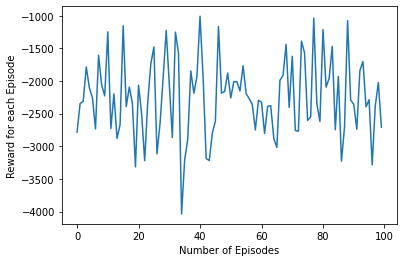

In [44]:
#Plot the convergence
plt.plot(list(range(len(rewards_per_episode))), rewards_per_episode)
plt.xlabel("Number of Episodes")
plt.ylabel("Reward for each Episode")
#plt.yscale('log')
plt.show()

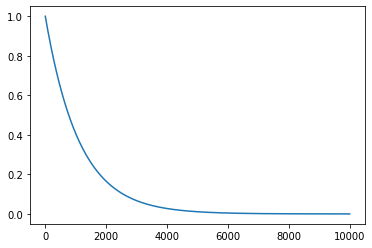

In [45]:
#Sample epsilon decay expression
time = np.arange(0,10000)
epsilon = []
for i in range(0,10000):
    epsilon.append(0 + (1 - 0) * np.exp(-0.0009*i))

plt.plot(time, epsilon)
plt.show() 